# Nisha Makwana - B01040428

# Case Study 1 : Data Mining in Financial Data

**Financial Data Collection:** 
* Please collect five-year stock price data of at least 5 stocks. You can choose any stocks you'd like to analyze.
* You have multiple ways of collecting financial data with Python, here is a reference: https://www.alpharithms.com/python-financial-data-491110/
* Load the data you collect and start working on your idea.


# Problem: pick a data science problem that you plan to solve using Stock Price Data
* The problem should be important and interesting, which has a potential impact in some area.
* The problem should be solvable using the data available and data science solutions.

Please briefly describe in the following cell: what problem are you trying to solve? why this problem is important and interesting?

Using previous stock price data, my goal is to forecast the prices of stocks for the upcoming month. This issue is important because traders and investors can benefit from precise stock price forecasts, helping them in being able to make smart choices about buying or selling of stocks.  It can also be useful for risk management and portfolio optimization.  Financial markets are dynamic and complex, which provides a challenge and a fascinating subject for data science solutions.

# Data Collection/Processing: 

In [74]:
#----------------------------------------------
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary



import pandas as pd
import yfinance as yf

# Function to collect stocks history
def fetch_stock_data(ticker, starting_date, ending_date):
    stock_data = yf.download(ticker, start=starting_date, end=ending_date)
    return stock_data

# List of stocks
stocks = ['PINS', 'AAPL', 'MSFT', 'NVDA', 'LCID']

# Fetch data for each stock
starting_date = '2017-01-01'
ending_date = '2022-01-01'
stock_data = {ticker: fetch_stock_data(ticker, starting_date, ending_date) for ticker in stocks}

# Display a sample of all stocks
# Display first 5 raw of each stocks
for stock, data in stock_data.items():
    print(f"\n{stock} Stock Data:")
    print(data.head())

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


PINS Stock Data:
                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2019-04-18  23.750000  25.180000  23.049999  24.400000  24.400000  87109500
2019-04-22  24.620001  25.680000  23.570000  24.990000  24.990000  19746800
2019-04-23  25.379999  27.750000  25.230000  25.850000  25.850000  19245400
2019-04-24  26.500000  27.030001  25.933001  26.799999  26.799999   9477200
2019-04-25  27.450001  29.400000  26.670000  28.799999  28.799999  16648300

AAPL Stock Data:
                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2017-01-03  28.950001  29.082500  28.690001  29.037500  27.023708  115127600
2017-01-04  28.962500  29.127501  28.937500  29.004999  26.993456   84472400
2017-01-05  28.980000  29.215000  28.952499  29.152500  27.130730   88774400
2017-01-06  29.195000  29.540001  29.117500  29

# Data Exploration: Exploring the Dataset

**Plot the daily, weekly and monthly returns of a set of stocks of your choice** 
* references:
    * https://www.investopedia.com/terms/y/yearly-rate-of-return-method.asp
    * https://www.fool.com/knowledge-center/how-to-calculate-a-monthly-return-on-investment/#:~:text=Take%20the%20ending%20balance%2C%20and,corresponds%20to%20your%20monthly%20return.
    * https://www.investopedia.com/terms/i/intraday-return.asp#:~:text=How%20Is%20Daily%20Return%20Calculated,price%2C%20then%20multiply%20by%20100. 


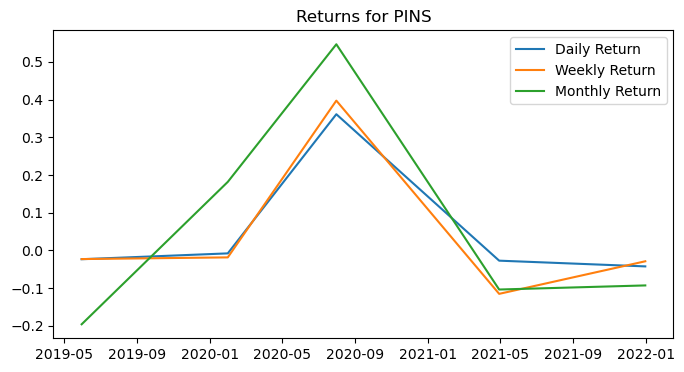

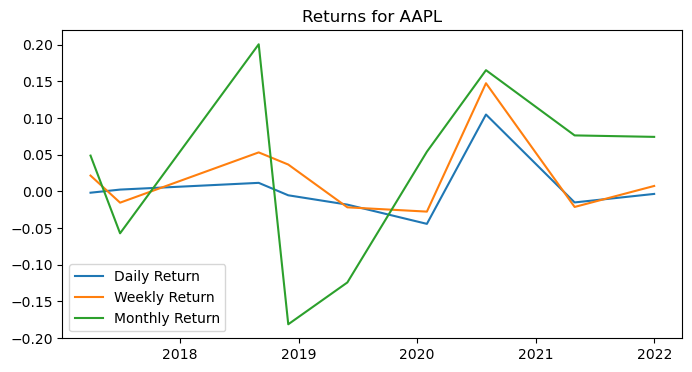

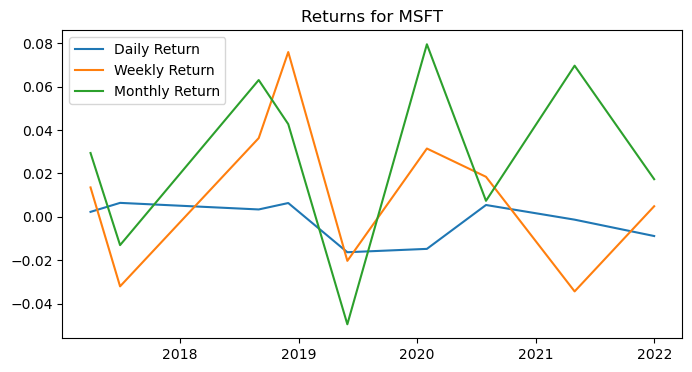

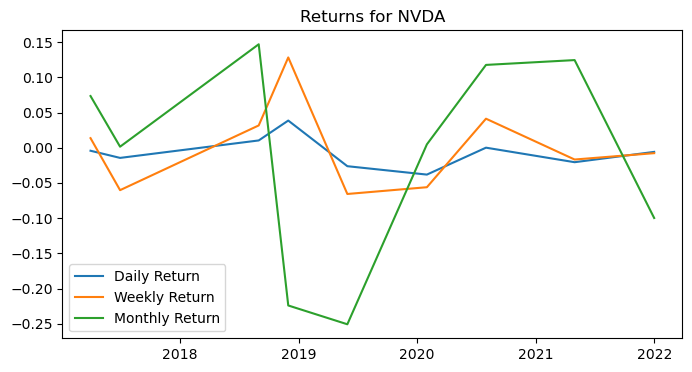

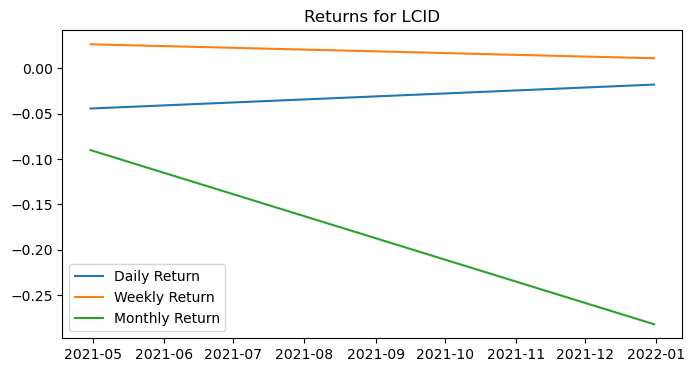

In [75]:
import matplotlib.pyplot as plt

# Evaluate daily, weekly, and monthly returns for all stocks
for ticker, data in stock_data.items():
    data['Daily_Return_stocks'] = data['Adj Close'].pct_change()
    data['Weekly_Return_stocks'] = data['Adj Close'].resample('W-Fri').ffill().pct_change()
    data['Monthly_Return_stocks'] = data['Adj Close'].resample('M').ffill().pct_change()

    # Plot returns with legend for stocks
    returns_data = data[['Daily_Return_stocks', 'Weekly_Return_stocks', 'Monthly_Return_stocks']].dropna()
    if not returns_data.empty and not returns_data.iloc[0].isnull().all():
        plt.figure(figsize=(8, 4))
        plt.plot(returns_data)
        plt.title(f'Returns for {ticker}')
        plt.legend(['Daily Return', 'Weekly Return', 'Monthly Return']) 
        plt.show()
        
        
        
        
        

**Other data explorations you would like to present:**

The correlation matrix for daily returns' heatmap provides information on how different stocks move relative to one another. Stocks are moving in the same direction when positive values are close to 1, and in the opposite direction when negative values are close to -1. Risk assessment and opportunity identification for diversification are made easier by the correlation coefficient's magnitude, which shows the strength of the relationship. This information is important for portfolio optimization, helping investors create well-balanced portfolios that consider the interplay of stock movements for effective risk management.


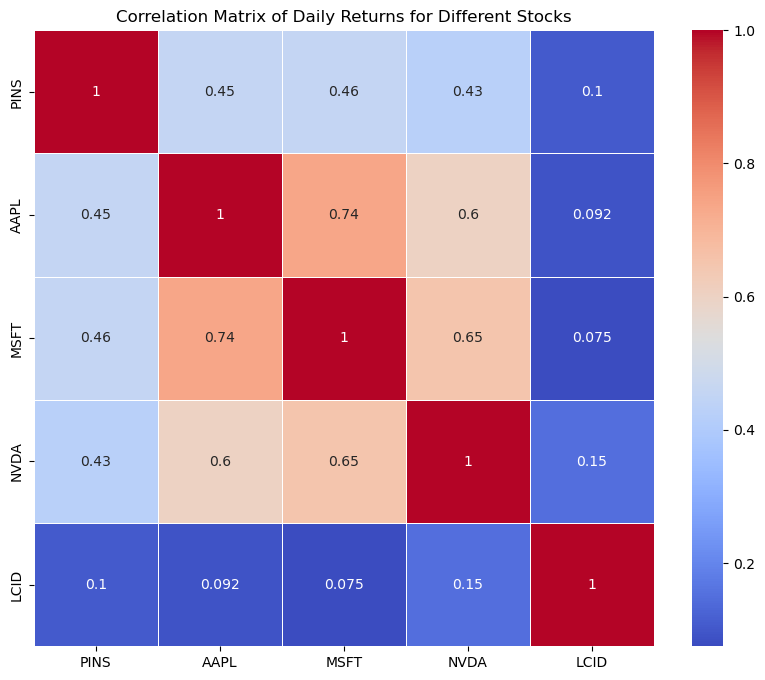

In [76]:

import seaborn as sns

# Evaluate daily returns for stocks
for ticker, data in stock_data.items():
    data['Daily_Return_stocks'] = data['Adj Close'].pct_change()

# Merge daily returns into a single dataframe
returns_df = pd.concat([data['Daily_Return_stocks'] for data in stock_data.values()], axis=1)
returns_df.columns = stock_data.keys()

# Calculate the correlation matrix
correlation_matrix = returns_df.corr()

# Heatmap visualization for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix of Daily Returns for Different Stocks')
plt.show()





# The Solution: implement a data science solution to the problem you are trying to solve.

**Briefly describe the idea of your solutions to the problem in the following cell (you should use at least 2 methods/models to solve the problem, and compare the performance. You are free to use any machine learning model or statistical model like ARIMA.):**

The goal is to predict the stock prices for the next month. I will implement two approaches: machine learning models, such as a Linear Regression Model and a Random Forest Regressor Model, to capture complex patterns in the data. I will compare their performances in terms of 
MAE (Mean Absolute Error) and RMSE (Root Mean Squared Error.)

**Write codes to implement the solution in python:**

In [77]:
import warnings
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Future Warning suppression
warnings.filterwarnings('ignore', category=FutureWarning)

# Initialize empty lists to store results of stocks
stocks = []
mae_linear_list, rmse_linear_list = [], []
mae_rf_list, rmse_rf_list = [], []

# Loop through each stock in stock_data
for stock_name, stock_df in stock_data.items():
    
    # Feature engineering for the machine learning model
    stock_df['Day'] = stock_df.index.day
    stock_df['Month'] = stock_df.index.month
    stock_df['Year'] = stock_df.index.year

    # Train-test split
    train_size = int(len(stock_df) * 0.8)
    train, test = stock_df[:train_size], stock_df[train_size:]

    # Handling missing values
    imputer = SimpleImputer(strategy='mean')
    train = pd.DataFrame(imputer.fit_transform(train), columns=train.columns)
    test = pd.DataFrame(imputer.transform(test), columns=test.columns)

    # Linear Regression Model for all stocks
    features = ['Day', 'Month', 'Year', 'Daily_Return_stocks', 'Weekly_Return_stocks', 'Monthly_Return_stocks']
    X_train, y_train = train[features], train['Adj Close']
    X_test, y_test = test[features], test['Adj Close']

    model_linear = LinearRegression()
    model_linear.fit(X_train, y_train)
    predictions_linear = model_linear.predict(X_test)

    # Random Forest Regressor Model for stocks
    model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
    model_rf.fit(X_train, y_train)
    predictions_rf = model_rf.predict(X_test)

    # Evaluate models 
    mae_linear = mean_absolute_error(y_test, predictions_linear)
    rmse_linear = mean_squared_error(y_test, predictions_linear, squared=False)  # RMSE calculation
    mae_rf = mean_absolute_error(y_test, predictions_rf)
    rmse_rf = mean_squared_error(y_test, predictions_rf, squared=False)  # RMSE calculation

    # Store results in empty lists
    stocks.append(stock_name)
    mae_linear_list.append(mae_linear)
    rmse_linear_list.append(rmse_linear)
    mae_rf_list.append(mae_rf)
    rmse_rf_list.append(rmse_rf)

# Create a DataFrame with results for all stocks
results_df = pd.DataFrame({
    'Stock': stocks,
    'MAE_Linear': mae_linear_list,
    'RMSE_Linear': rmse_linear_list,
    'MAE_RandomForest': mae_rf_list,
    'RMSE_RandomForest': rmse_rf_list
}, index=range(1, len(stocks) + 1))

# Print results
print(results_df)


  Stock  MAE_Linear  RMSE_Linear  MAE_RandomForest  RMSE_RandomForest
1  PINS   23.069234    26.660532         16.514014          19.038112
2  AAPL   38.159316    39.157393         45.482715          46.775469
3  MSFT   53.687076    59.344584         82.478913          84.867788
4  NVDA   92.832493   105.188564         95.741966         102.260121
5  LCID   15.450351    18.515586         15.193192          18.180229


# Results: summarize and visualize the results discovered from the analysis

**Summarize the results of different models. Compare the perfomance and explain it. Please use figures or tables to present the results.**


Results Summary:
  Stock  MAE_Linear  RMSE_Linear  MAE_RandomForest  RMSE_RandomForest
1  PINS   23.069234    26.660532         16.514014          19.038112
2  AAPL   38.159316    39.157393         45.482715          46.775469
3  MSFT   53.687076    59.344584         82.478913          84.867788
4  NVDA   92.832493   105.188564         95.741966         102.260121
5  LCID   15.450351    18.515586         15.193192          18.180229


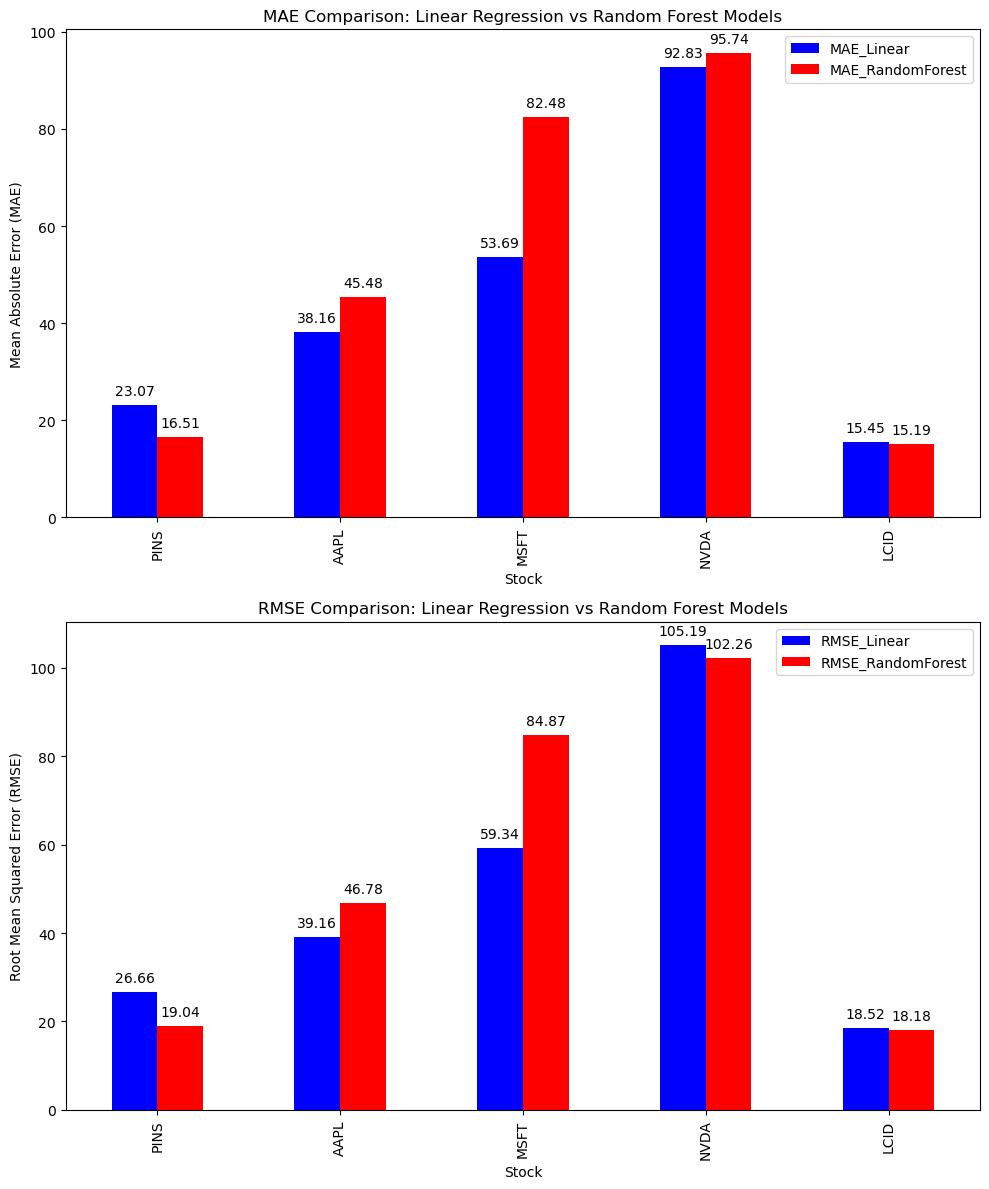

In [78]:
import matplotlib.pyplot as plt
import pandas as pd

# Print the summary
print("Results Summary:")
print(results_df)

# Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# Create a bar chart for the comparison of MAE across all stocks.
bar_colors = ['blue', 'red']
results_df.plot(kind='bar', x='Stock', y=['MAE_Linear', 'MAE_RandomForest'], ax=ax1, color=bar_colors)
ax1.set_ylabel('Mean Absolute Error (MAE)')
ax1.set_title('MAE Comparison: Linear Regression vs Random Forest Models')

# Include the numerical values on the top of each bar in the bar chart.
for p in ax1.patches:
    ax1.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Create a bar chart for the comparison of RMSE across all stocks.
results_df.plot(kind='bar', x='Stock', y=['RMSE_Linear', 'RMSE_RandomForest'], ax=ax2, color=bar_colors)
ax2.set_ylabel('Root Mean Squared Error (RMSE)')
ax2.set_title('RMSE Comparison: Linear Regression vs Random Forest Models')

# Include the numerical values on the top of each bar in the bar chart.
for p in ax2.patches:
    ax2.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()



# Done

All set! 

**What do you need to submit?**

* **Notebook File**: Save this Jupyter notebook, and submit it in BrightSpace. This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook. 


**How to submit:**
* Please submit through BrightSpace, in the Assignment "Case Study 1".
        
        
